# Heroes of Py - Cheng (Report)
* Three (3) Osbservable Trends:

    * 1.) The game "Heroes of Py" is extremely male dominated with 84.03% male participants (compared to 14.06% female and 1.91% non-disclosed)
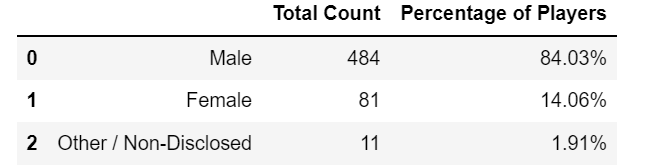
    
    * 2.)Though women particpate by volumen less, on average they spend more then their male counterparts as demonstrated in the below table:
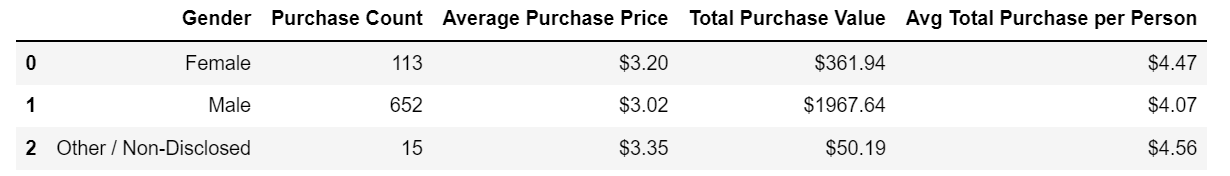
    
    * 3.)The main age demographic that particpates in this game are between 22-24 years of age(44.79%)
    
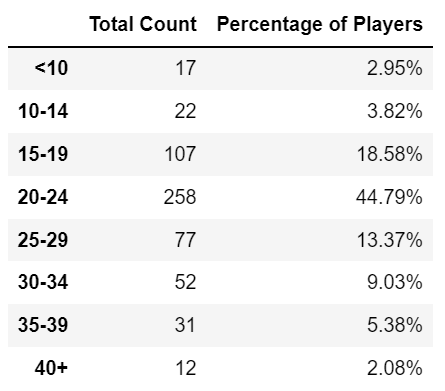

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#HeroesofPy Homework - Cheng Tan Answers

# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [2]:
total_players = (purchase_data["SN"].value_counts()).count()
total_players

576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
#run calculation for the data required
uniqueitem_df = (purchase_data["Item ID"].value_counts()).count()
totalrevenue_df = purchase_data["Price"].sum()
totalpurchase_df = purchase_data["Purchase ID"].count()
avgprice_df = totalrevenue_df / totalpurchase_df

#display summary of data
summary_df = pd.DataFrame(
    {"Number of Unique Items":[uniqueitem_df],
     "Average Price":[avgprice_df],
     "Number of Purchases":[totalpurchase_df],
     "Total Revenue":[totalrevenue_df]
    }
)

#set formatting for the appropriate columns
summary_df["Total Revenue"] = summary_df["Total Revenue"].map("${:.2f}".format)
summary_df["Average Price"] = summary_df["Average Price"].map("${:.2f}".format)

summary_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,$2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
#Create calcs for just male players to ge unique player count
male_summary = purchase_data.loc[purchase_data["Gender"] == "Male"]
male_count = (male_summary["SN"].value_counts()).count()

#Create calcs for just female players to get unique player count
female_summary = purchase_data.loc[purchase_data["Gender"] == "Female"]
female_count = (female_summary["SN"].value_counts()).count()

#Create calcs for just non-diclosed gender players to get unique player count
nondisc_summary = purchase_data.loc[purchase_data["Gender"] == "Other / Non-Disclosed"]
nondisc_count = (nondisc_summary["SN"].value_counts()).count()

#used below to check total for formulas = 576 as a check (uniqueSN)
#total_check = nondisc_count + female_count + male_count
#total_check

#calculate the %s
percentmale = (male_count / total_players)*100
percentfemale = (female_count / total_players)*100
percentnondisc = (nondisc_count / total_players)*100

#create gender as dictionary
gen_dict = [{"": "Male", "Total Count":male_count, "Percentage of Players":percentmale},
            {"": "Female", "Total Count":female_count, "Percentage of Players":percentfemale},
            {"": "Other / Non-Disclosed", "Total Count":nondisc_count, "Percentage of Players":percentnondisc}
           ]
#convert dictionary to dataframe
gender_df = pd.DataFrame(gen_dict)

#set formatting for the appropriate columns
gender_df["Percentage of Players"] = gender_df["Percentage of Players"].map("{:.2f}%".format)
       

gender_df

,,Total Count,Percentage of Players
0,Male,484,84.03%
1,Female,81,14.06%
2,Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
#purchase count for each gender group
male_purchase = male_summary["Gender"].count()
female_purchase = female_summary["Gender"].count()
nondisc_purchase = nondisc_summary["Gender"].count()

#total purchase per person by gender
total_male_purchase = male_summary["Price"].sum()
total_female_purchase = female_summary["Price"].sum()
total_nondisc_purchase = nondisc_summary["Price"].sum()

#average purchase price calculation by gender per item
avg_male_spend = total_male_purchase / male_purchase
avg_female_spend = total_female_purchase / female_purchase
avg_nondisc_spend = total_nondisc_purchase / nondisc_purchase

#average purchase total per unique person
avg_male_spend_pp = total_male_purchase / male_count
avg_female_spend_pp = total_female_purchase / female_count
avg_nondisc_spend_pp = total_nondisc_purchase / nondisc_count

#create purchase dictionary by gender
purchase_dict = [{"Gender": "Female", "Purchase Count":female_purchase, "Average Purchase Price":avg_female_spend, "Total Purchase Value":total_female_purchase, "Avg Total Purchase per Person":avg_female_spend_pp},
            {"Gender": "Male", "Purchase Count":male_purchase, "Average Purchase Price":avg_male_spend, "Total Purchase Value":total_male_purchase, "Avg Total Purchase per Person":avg_male_spend_pp},
 {"Gender": "Other / Non-Disclosed", "Purchase Count":nondisc_purchase, "Average Purchase Price":avg_nondisc_spend, "Total Purchase Value":total_nondisc_purchase, "Avg Total Purchase per Person":avg_nondisc_spend_pp}]

#convert dictionary to dataframe
purchase_df = pd.DataFrame(purchase_dict)

#set formatting for the appropriate columns
purchase_df["Average Purchase Price"] = purchase_df["Average Purchase Price"].map("${:.2f}".format)
purchase_df["Avg Total Purchase per Person"] = purchase_df["Avg Total Purchase per Person"].map("${:.2f}".format)
purchase_df["Total Purchase Value"] = purchase_df["Total Purchase Value"].map("${:.2f}".format)

purchase_df

#attempt below to create summary table using Group command (review later)
#groupby_gender = purchase_data.groupby(["Gender"])
#groupby_gender_df = pd.DataFrame(groupby_gender)

#purchase_gender_df = pd.merge(groupby_gender_df,gender_df,on="Gender",how="inner")
#purchase_gender_df

,Gender,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
0,Female,113,$3.20,$361.94,$4.47
1,Male,652,$3.02,$1967.64,$4.07
2,Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [12]:
#Create Age Data Frame cut
age_df = purchase_data[["SN","Age"]]
age_df = age_df.drop_duplicates()


#calculate each age group count
age_10 = age_df[age_df["Age"] < 10].count()[0]
age_14 = age_df[(age_df["Age"] >= 10) & (age_df["Age"] <= 14)].count()[0]
age_19 = age_df[(age_df["Age"] >= 15) & (age_df["Age"] <= 19)].count()[0]
age_24 = age_df[(age_df["Age"] >= 20) & (age_df["Age"] <= 24)].count()[0]
age_29 = age_df[(age_df["Age"] >= 25) & (age_df["Age"] <= 29)].count()[0]
age_34 = age_df[(age_df["Age"] >= 30) & (age_df["Age"] <= 34)].count()[0]
age_39 = age_df[(age_df["Age"] >= 35) & (age_df["Age"] <= 39)].count()[0]
age_40 = age_df[age_df["Age"] >= 40].count()[0]
ages = [age_10, age_14, age_19, age_24, age_29, age_34, age_39, age_40]

# Percents calculations
percent_10 = round((age_10/total_players*100),2)
percent_14 = round((age_14/total_players*100),2)
percent_19 = round((age_19/total_players*100),2)
percent_24 = round((age_24/total_players*100),2)
percent_29 = round((age_29/total_players*100),2)
percent_34 = round((age_34/total_players*100),2)
percent_39 = round((age_39/total_players*100),2)
percent_40 = round((age_40/total_players*100),2)
percent_age = [percent_10, percent_14, percent_19, percent_24, percent_29, percent_34, percent_39, percent_40]

#Create the dictionary for the age data
age_dict = {
    "Total Count":ages,
    "Percentage of Players":percent_age
}

#creating the DataFrame
age_group_df = pd.DataFrame(age_dict)
age_group_df.index = (["<10", "10-14", "15-19","20-24", "25-29", "30-34",
              "35-39","40+"])
age_group_df["Percentage of Players"] = age_group_df["Percentage of Players"].map("{:.2f}%".format)

age_group_df

,Total Count,Percentage of Players
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
# Purchase Count
purchase_10 = purchase_data[purchase_data["Age"] < 10].count()[0]
purchase_14 = purchase_data[(purchase_data["Age"] >= 10) & (purchase_data["Age"] <= 14)].count()[0]
purchase_19 = purchase_data[(purchase_data["Age"] >= 15) & (purchase_data["Age"] <= 19)].count()[0]
purchase_24 = purchase_data[(purchase_data["Age"] >= 20) & (purchase_data["Age"] <= 24)].count()[0]
purchase_29 = purchase_data[(purchase_data["Age"] >= 25) & (purchase_data["Age"] <= 29)].count()[0]
purchase_34 = purchase_data[(purchase_data["Age"] >= 30) & (purchase_data["Age"] <= 34)].count()[0]
purchase_39 = purchase_data[(purchase_data["Age"] >= 35) & (purchase_data["Age"] <= 39)].count()[0]
purchase_40 = purchase_data[purchase_data["Age"] >= 40].count()[0]
purchases_a = [purchase_10, purchase_14, purchase_19, purchase_24, purchase_29, purchase_34, purchase_39, purchase_40]

# Total Purchase Value
value_10 = purchase_data.loc[purchase_data['Age'] < 10, 'Price'].sum()
value_14 = purchase_data.loc[(purchase_data['Age'] >= 10) & (purchase_data['Age'] <=14), 'Price'].sum()
value_19 = purchase_data.loc[(purchase_data['Age'] >= 15) & (purchase_data['Age'] <=19), 'Price'].sum()
value_24 = purchase_data.loc[(purchase_data['Age'] >= 20) & (purchase_data['Age'] <=24), 'Price'].sum()
value_29 = purchase_data.loc[(purchase_data['Age'] >= 25) & (purchase_data['Age'] <=29), 'Price'].sum()
value_34 = purchase_data.loc[(purchase_data['Age'] >= 30) & (purchase_data['Age'] <=34), 'Price'].sum()
value_39 = purchase_data.loc[(purchase_data['Age'] >= 35) & (purchase_data['Age'] <=39), 'Price'].sum()
value_40 = purchase_data.loc[purchase_data['Age'] >= 40, 'Price'].sum()
value_a = [value_10, value_14, value_19, value_24, value_29, value_34, value_39, value_40]

# Average Purchase Price
avg_price = [value_10/purchase_10, value_14/purchase_14, value_19/purchase_19, value_24/purchase_24, value_29/purchase_29,
              value_34/purchase_34, value_39/purchase_39, value_40/purchase_40]

# Normalized Totals
norms_a = [value_10/age_10, value_14/age_14, value_19/age_19, value_24/age_24, value_29/age_29, value_34/age_34,
           value_39/age_39, value_40/age_40]

# Creating dictionary
puchase_analysis_a = {
    "Purchase Count": purchases_a,
    "Average Purchase Price": avg_price,
    "Total Purchase Value": value_a,
    "Normalized Totals": norms_a
}

# Creating DataFrame setting the index for the age ranges
purchase_analysis_a_df = pd.DataFrame(puchase_analysis_a)
purchase_analysis_a_df = purchase_analysis_a_df[['Purchase Count', 'Average Purchase Price', 'Total Purchase Value',
                                                 'Normalized Totals']]
purchase_analysis_a_df.index = (["<10", "10-14","15-19","20-24","25-29","30-34","34-39","40+"])

# Formatting Prices
purchase_analysis_a_df.style.format({"Average Purchase Price": "${:.2f}", "Normalized Totals": "${:.2f}",
                                     "Total Purchase Value":"${:.2f}"})

,Purchase Count,Average Purchase Price,Total Purchase Value,Normalized Totals
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,$1114.06,$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
34-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [8]:
#Create new dataframe to start
SN_df = purchase_data[["SN","Price","Item Name"]]

#Groupby SN
total_purchase = SN_df.groupby("SN").sum()
#Sort by total purchase
total_purchase.sort_values(by = "Price", ascending = False, inplace = True)

#Top spender by SN
names = list(total_purchase.index.values)
top_five = [names[0],names[1],names[2],names[3],names[4]]

#Sum of spend values using an iloc
total_spend_values_1 = total_purchase.iloc[0,0]
total_spend_values_2 = total_purchase.iloc[1,0]
total_spend_values_3 = total_purchase.iloc[2,0]
total_spend_values_4 = total_purchase.iloc[3,0]
total_spend_values_5 = total_purchase.iloc[4,0]
top_spend_values = [total_spend_values_1, 
                    total_spend_values_2, 
                    total_spend_values_3, 
                    total_spend_values_4,
                    total_spend_values_5]

#Top spend counts
top_spend_counts_1 = SN_df[SN_df["SN"] == names[0]].count()[0]
top_spend_counts_2 = SN_df[SN_df["SN"] == names[1]].count()[0]
top_spend_counts_3 = SN_df[SN_df["SN"] == names[2]].count()[0]
top_spend_counts_4 = SN_df[SN_df["SN"] == names[3]].count()[0]
top_spend_counts_5 = SN_df[SN_df["SN"] == names[4]].count()[0]
top_spend_count = [top_spend_counts_1,
                   top_spend_counts_2,
                   top_spend_counts_3,
                   top_spend_counts_4,
                   top_spend_counts_5]

#Calculate the avergage for the top 5
avg_spend_1 = total_spend_values_1/top_spend_counts_1
avg_spend_2 = total_spend_values_2/top_spend_counts_2
avg_spend_3 = total_spend_values_3/top_spend_counts_3
avg_spend_4 = total_spend_values_4/top_spend_counts_4
avg_spend_5 = total_spend_values_5/top_spend_counts_5
avg_spend = [avg_spend_1,
            avg_spend_2,
            avg_spend_3,
            avg_spend_4,
            avg_spend_5]
#place calculation data into a dictionary
top_5_dict = {
    "Purchase Count": top_spend_count,
    "Average Purchase Price": avg_spend,
    "Total Purchase Value": top_spend_values,
    "SN": top_five
}

#Create dataframe from the dictionary
top_5_df = pd.DataFrame(top_5_dict)
top_5_df = top_5_df.set_index("SN")

# Formatting Prices
top_5_df["Average Purchase Price"] = top_5_df["Average Purchase Price"].map("${:.2f}".format)
top_5_df["Total Purchase Value"] = top_5_df["Total Purchase Value"].map("${:.2f}".format)

top_5_df


,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [11]:
popular_df = purchase_data[["Item ID", "Item Name", "Price"]]
group_popular_df = popular_df.groupby(["Item ID", "Item Name"])

popular_dict = {"Purchase Count": group_popular_df["Item ID"].count(),
                "Item Price": group_popular_df["Price"].mean(),
                "Total Purchase Value": group_popular_df["Price"].sum()
                }

popular2_df = pd.DataFrame.from_dict(popular_dict, orient='columns')
popular2_df = popular2_df.sort_values("Purchase Count", ascending = False)

#Fix formatting
popular2_df["Item Price"] = popular2_df["Item Price"].map("${:,.2f}".format)
popular2_df["Total Purchase Value"] = popular2_df["Total Purchase Value"].map("${:,.2f}".format)


popular2_df.head()


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame

